In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
np.random.seed(69)

In [ ]:
sample = data.sample(n=25)

In [ ]:
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

In [ ]:
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

In [ ]:
variables = ['Mean Glucose', 'Highest Glucose']
population_values = [population_mean_glucose, population_max_glucose]
sample_values = [sample_mean_glucose, sample_max_glucose]

In [ ]:
x = np.arange(len(variables))
width = 0.15

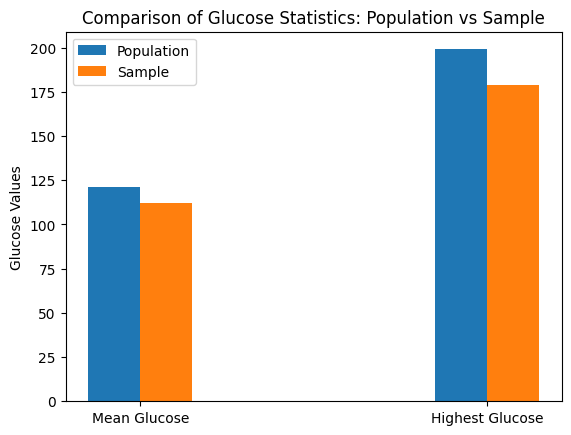

In [ ]:
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, population_values, width, label='Population')
bars2 = ax.bar(x + width/2, sample_values, width, label='Sample')
ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics: Population vs Sample')
ax.set_xticks(x)
ax.set_xticklabels(variables)
ax.legend()
plt.show()

In [ ]:
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

In [ ]:
print(population_98th_percentile_bmi)
print(sample_98th_percentile_bmi)

47.52599999999996
49.38399999999999


In [ ]:
variables = ['98th Percentile BMI']
population_values = [population_98th_percentile_bmi]
sample_values = [sample_98th_percentile_bmi]

In [ ]:
x = np.arange(len(variables))
width = 0.05

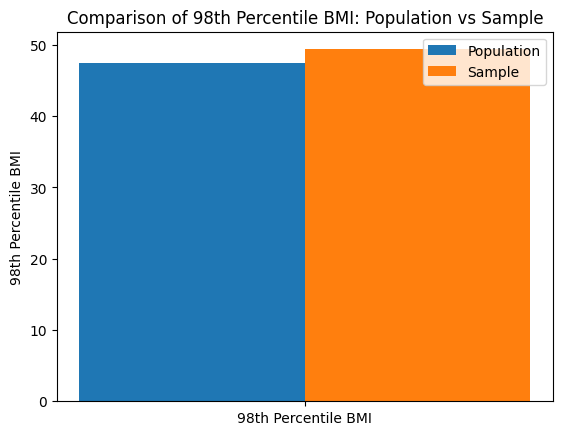

In [ ]:
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, population_values, width, label='Population')
bars2 = ax.bar(x + width/2, sample_values, width, label='Sample')
ax.set_ylabel('98th Percentile BMI')
ax.set_title('Comparison of 98th Percentile BMI: Population vs Sample')
ax.set_xticks(x)
ax.set_xticklabels(variables)
ax.legend()
plt.show()

In [ ]:
np.random.seed(69)

In [ ]:
num_samples = 500
sample_size = 150

In [ ]:
def calculate_statistics(data):
    mean = data.mean()
    std_dev = data.std()
    percentile = np.percentile(data, 50)
    return mean, std_dev, percentile

In [ ]:
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

In [ ]:
for _ in range(num_samples):
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    mean, std_dev, percentile = calculate_statistics(bootstrap_sample)
    bootstrap_means.append(mean)
    bootstrap_std_devs.append(std_dev)
    bootstrap_percentiles.append(percentile)

In [ ]:
population_mean, population_std_dev, population_percentile = calculate_statistics(data['BloodPressure'])

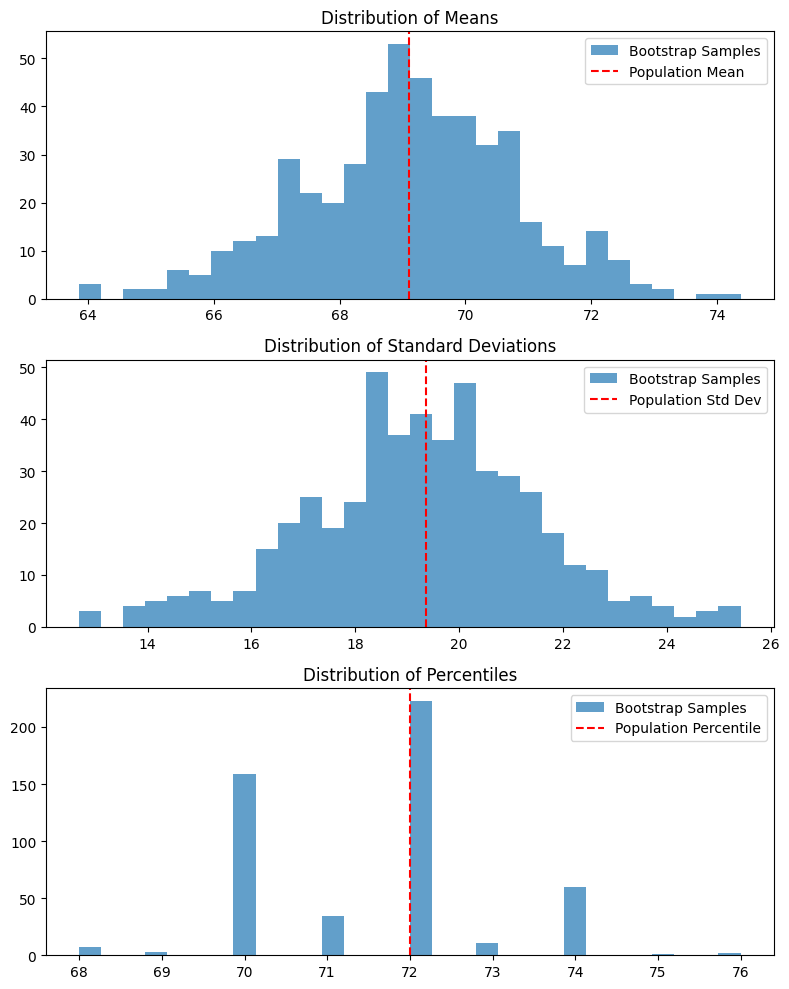

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Samples')
axs[0].axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
axs[0].set_title('Distribution of Means')
axs[0].legend()
axs[1].hist(bootstrap_std_devs, bins=30, alpha=0.7, label='Bootstrap Samples')
axs[1].axvline(x=population_std_dev, color='red', linestyle='--', label='Population Std Dev')
axs[1].set_title('Distribution of Standard Deviations')
axs[1].legend()
axs[2].hist(bootstrap_percentiles, bins=30, alpha=0.7, label='Bootstrap Samples')
axs[2].axvline(x=population_percentile, color='red', linestyle='--', label='Population Percentile')
axs[2].set_title('Distribution of Percentiles')
axs[2].legend()
plt.tight_layout()
plt.show()